In [1]:
# imports
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy.stats as sstats
from os.path import join, exists

In [2]:
PROJ_DIR = '/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/'
DATA_DIR = 'data/'
FIGS_DIR = 'figures/'
OUTP_DIR = 'output/'

In [10]:
nihtb = pd.read_csv('/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/Data/pre_release4.0/tabulated/non_img/abcd_tbss01.csv', 
                    index_col=0, header=0)

In [14]:
nihtb['eventname'].unique()

array(['2_year_follow_up_y_arm_1', 'baseline_year_1_arm_1'], dtype=object)

In [15]:
for i in nihtb.index.unique():
    df.at[i, ]

Index(['NDAR_INV003RTV85', 'NDAR_INV005V6D2C', 'NDAR_INV007W6H7B',
       'NDAR_INV00BD7VDC', 'NDAR_INV00CY2MDM', 'NDAR_INV00HEV6HB',
       'NDAR_INV00J52GPG', 'NDAR_INV00LH735Y', 'NDAR_INV00LJVZK2',
       'NDAR_INV00NPMHND',
       ...
       'NDAR_INVZZ81LEEV', 'NDAR_INVZZFG6J5U', 'NDAR_INVZZJ3A7BK',
       'NDAR_INVZZL0VA2F', 'NDAR_INVZZLZCKAY', 'NDAR_INVZZNX6W2P',
       'NDAR_INVZZPKBDAC', 'NDAR_INVZZZ2ALR6', 'NDAR_INVZZZNB0XC',
       'NDAR_INVZZZP87KR'],
      dtype='object', name='subjectkey', length=11876)

In [7]:
df = pd.read_csv(join(PROJ_DIR, DATA_DIR, 'data.csv'), index_col=0, header=0)

In [8]:
df.head()

,dmri_rsin0_scs_clcxlh.baseline_year_1_arm_1,dmri_rsin0_scs_tplh.baseline_year_1_arm_1,dmri_rsin0_scs_ctelh.baseline_year_1_arm_1,dmri_rsin0_scs_pulh.baseline_year_1_arm_1,dmri_rsin0_scs_pllh.baseline_year_1_arm_1,dmri_rsin0_scs_bm.baseline_year_1_arm_1,dmri_rsin0_scs_hplh.baseline_year_1_arm_1,dmri_rsin0_scs_aylh.baseline_year_1_arm_1,dmri_rsin0_scs_aalh.baseline_year_1_arm_1,dmri_rsin0_scs_clcxrh.baseline_year_1_arm_1,...,sex.baseline_year_1_arm_1,sex.2_year_follow_up_y_arm_1,pds_p_ss_male_category.baseline_year_1_arm_1,pds_p_ss_male_category.2_year_follow_up_y_arm_1,pds_p_ss_female_category.baseline_year_1_arm_1,pds_p_ss_female_category.2_year_follow_up_y_arm_1,pds_p_ss_male_category_2.baseline_year_1_arm_1,pds_p_ss_male_category_2.2_year_follow_up_y_arm_1,pds_p_ss_female_category_2.baseline_year_1_arm_1,pds_p_ss_female_category_2.2_year_follow_up_y_arm_1
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INV003RTV85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDAR_INV005V6D2C,0.444549,0.373289,0.279921,0.348214,0.475528,0.412911,0.231157,0.254455,0.267161,0.461401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDAR_INV007W6H7B,0.418429,0.377561,0.273336,0.330637,0.454721,0.374884,0.248456,0.248396,0.307573,0.428479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDAR_INV00BD7VDC,0.484224,0.364199,0.250780,0.320009,0.441612,0.389311,0.225601,0.222256,0.270576,0.471460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NDAR_INV00CY2MDM,0.481001,0.377255,0.274394,0.338130,0.446028,0.402223,0.232299,0.223803,0.252633,0.475182,...,M,M,2.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN


In [9]:
imaging_qc = ['imgincl_dmri_include.baseline_year_1_arm_1', 'imgincl_dmri_include.2_year_follow_up_y_arm_1',
              'imgincl_rsfmri_include.baseline_year_1_arm_1', 'imgincl_rsfmri_include.2_year_follow_up_y_arm_1',
              'rsfmri_c_ngd_meanmotion.baseline_year_1_arm_1', 'rsfmri_c_ngd_meanmotion.2_year_follow_up_y_arm_1',
              'rsfmri_c_ngd_ntpoints.baseline_year_1_arm_1', 'rsfmri_c_ngd_ntpoints.2_year_follow_up_y_arm_1',
              'imgincl_t1w_include.baseline_year_1_arm_1', 'imgincl_t1w_include.2_year_follow_up_y_arm_1',
              'imgincl_t2w_include.baseline_year_1_arm_1', 'imgincl_t2w_include.2_year_follow_up_y_arm_1']
nihtb = ['nihtbx_picvocab_uncorrected.change_score',
         'nihtbx_flanker_uncorrected.change_score',
         'nihtbx_list_uncorrected.change_score',
         'nihtbx_cardsort_uncorrected.change_score',
         'nihtbx_pattern_uncorrected.change_score',
         'nihtbx_picture_uncorrected.change_score',
         'nihtbx_reading_uncorrected.change_score']
puberty = ['sex.baseline_year_1_arm_1', 'sex.2_year_follow_up_y_arm_1', 
           'pds_p_ss_male_category.baseline_year_1_arm_1', 'pds_p_ss_male_category.2_year_follow_up_y_arm_1', 
           'pds_p_ss_female_category.baseline_year_1_arm_1', 'pds_p_ss_female_category.2_year_follow_up_y_arm_1', 
           'pds_p_ss_male_category_2.baseline_year_1_arm_1', 'pds_p_ss_male_category_2.2_year_follow_up_y_arm_1', 
           'pds_p_ss_female_category_2.baseline_year_1_arm_1', 'pds_p_ss_female_category_2.2_year_follow_up_y_arm_1']
demographics = ['demo_prnt_ethn_v2', 'demo_prnt_marital_v2', 'demo_prnt_ed_v2', 'demo_comb_income_v2', 
                'demo_race_a_p___10', 'demo_race_a_p___11', 'demo_race_a_p___12', 'demo_race_a_p___13',
                'demo_race_a_p___14', 'demo_race_a_p___15', 'demo_race_a_p___16', 'demo_race_a_p___17',
                'demo_race_a_p___18', 'demo_race_a_p___19', 'demo_race_a_p___20', 'demo_race_a_p___21',
                'demo_race_a_p___22', 'demo_race_a_p___23', 'demo_race_a_p___24', 'demo_race_a_p___25']
mri = ['mri_info_manufacturer.baseline_year_1_arm_1', 
       'mri_info_manufacturer.2_year_follow_up_y_arm_1', 
       'interview_age.baseline_year_1_arm_1',
       'interview_age.2_year_follow_up_y_arm_1']
family = ['rel_family_id',
          'rel_group_id',
          'rel_ingroup_order',
          'rel_relationship']
site = ['site_id_l.baseline_year_1_arm_1', 'site_id_l.2_year_follow_up_y_arm_1']

What am I going to do?
If I add baseline and 2yfu imaging QC variables then any value less than 2 is an exclude.
and I can convert everything less than 2 to np.nan to use for missingness assessments. 
Need to find out what the "mean motion" value is. FD? yes, in mm.

In [10]:
# build a mini dataset that represents missingness on each variable
keep = nihtb + puberty + demographics + mri + family + site
miss_df = df[keep]

# grab imaging var names bc missingness is redundant across those
dmri_rgx = 'dmri.*'
dmri_cols = df.filter(regex=dmri_rgx, axis=1).columns
smri_rgx = 'smri.*'
smri_cols = df.filter(regex=smri_rgx, axis=1).columns
fmri_rgx = 'rsfmri.*'
fmri_cols = df.filter(regex=fmri_rgx, axis=1).columns

In [11]:
# using ABCD's inclusion criteria to further mask the data
# add include from baseline and y2, then convert all values <2 to nan

modalities = ['t1w', 'dmri', 't2w', 'rsfmri']
for modality in modalities:
    missing = pd.Series(index=miss_df.index)
    missing = df[f'imgincl_{modality}_include.baseline_year_1_arm_1'] + df[f'imgincl_{modality}_include.2_year_follow_up_y_arm_1']
    for i in miss_df.index:
        if missing.loc[i] == 2.0:
            miss_df.loc[i, f'{modality}_missing'] = 1
        else:
            miss_df.loc[i, f'{modality}_missing'] = np.nan
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


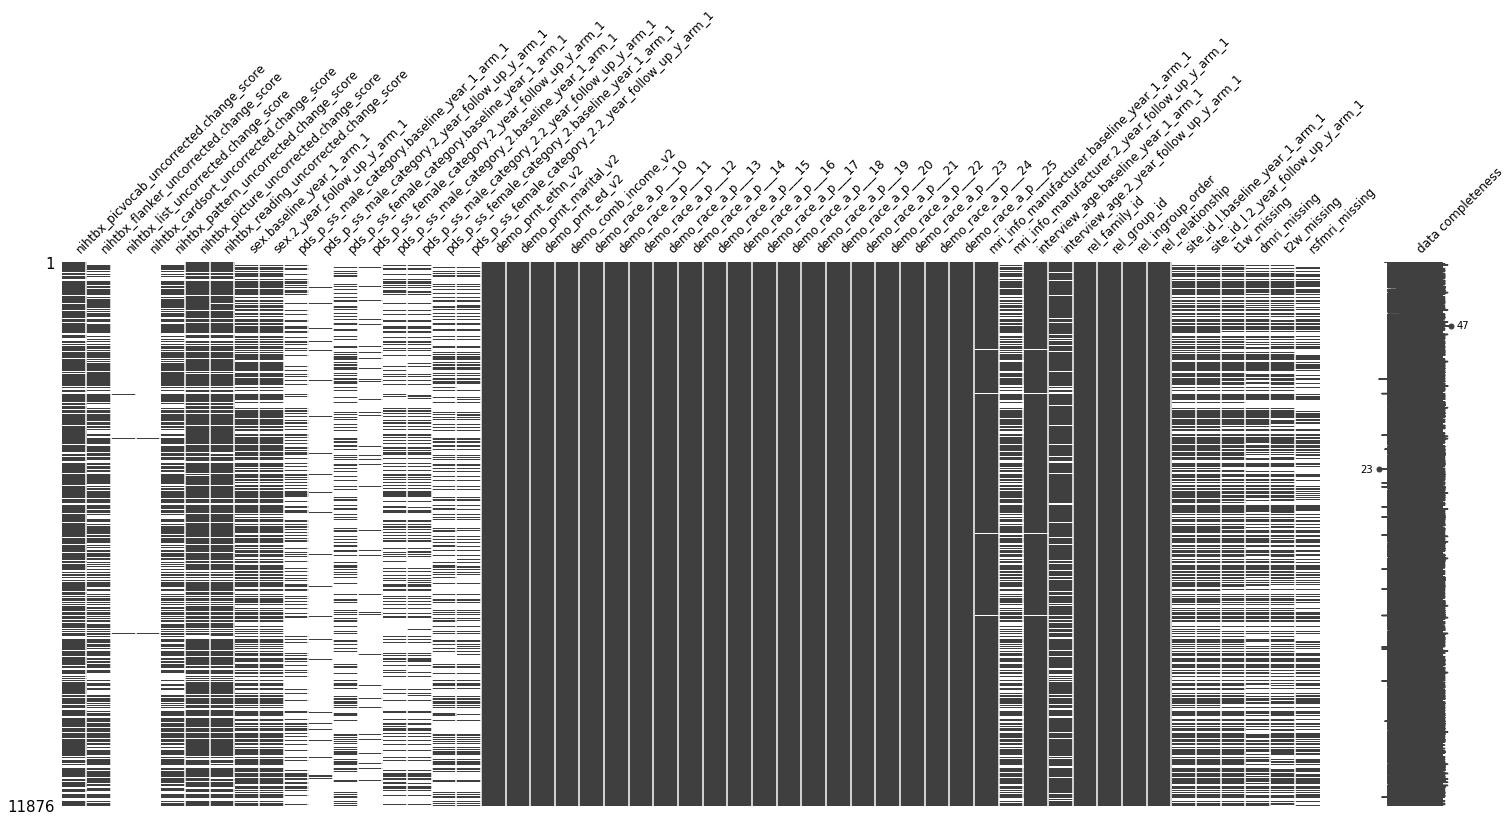

In [12]:
msno.matrix(miss_df, labels=True, fontsize=12)

In [15]:
# calculate percent misingness on each var
pct_miss = miss_df.isna().sum() / len(miss_df.index)

In [16]:
pct_miss

nihtbx_picvocab_uncorrected.change_score               0.180195
nihtbx_flanker_uncorrected.change_score                0.339087
nihtbx_list_uncorrected.change_score                   0.993937
nihtbx_cardsort_uncorrected.change_score               0.994527
nihtbx_pattern_uncorrected.change_score                0.342876
nihtbx_picture_uncorrected.change_score                0.178174
nihtbx_reading_uncorrected.change_score                0.184406
sex.baseline_year_1_arm_1                              0.341024
sex.2_year_follow_up_y_arm_1                           0.341024
pds_p_ss_male_category.baseline_year_1_arm_1           0.656871
pds_p_ss_male_category.2_year_follow_up_y_arm_1        0.948467
pds_p_ss_female_category.baseline_year_1_arm_1         0.704446
pds_p_ss_female_category.2_year_follow_up_y_arm_1      0.953772
pds_p_ss_male_category_2.baseline_year_1_arm_1         0.657039
pds_p_ss_male_category_2.2_year_follow_up_y_arm_1      0.663186
pds_p_ss_female_category_2.baseline_year

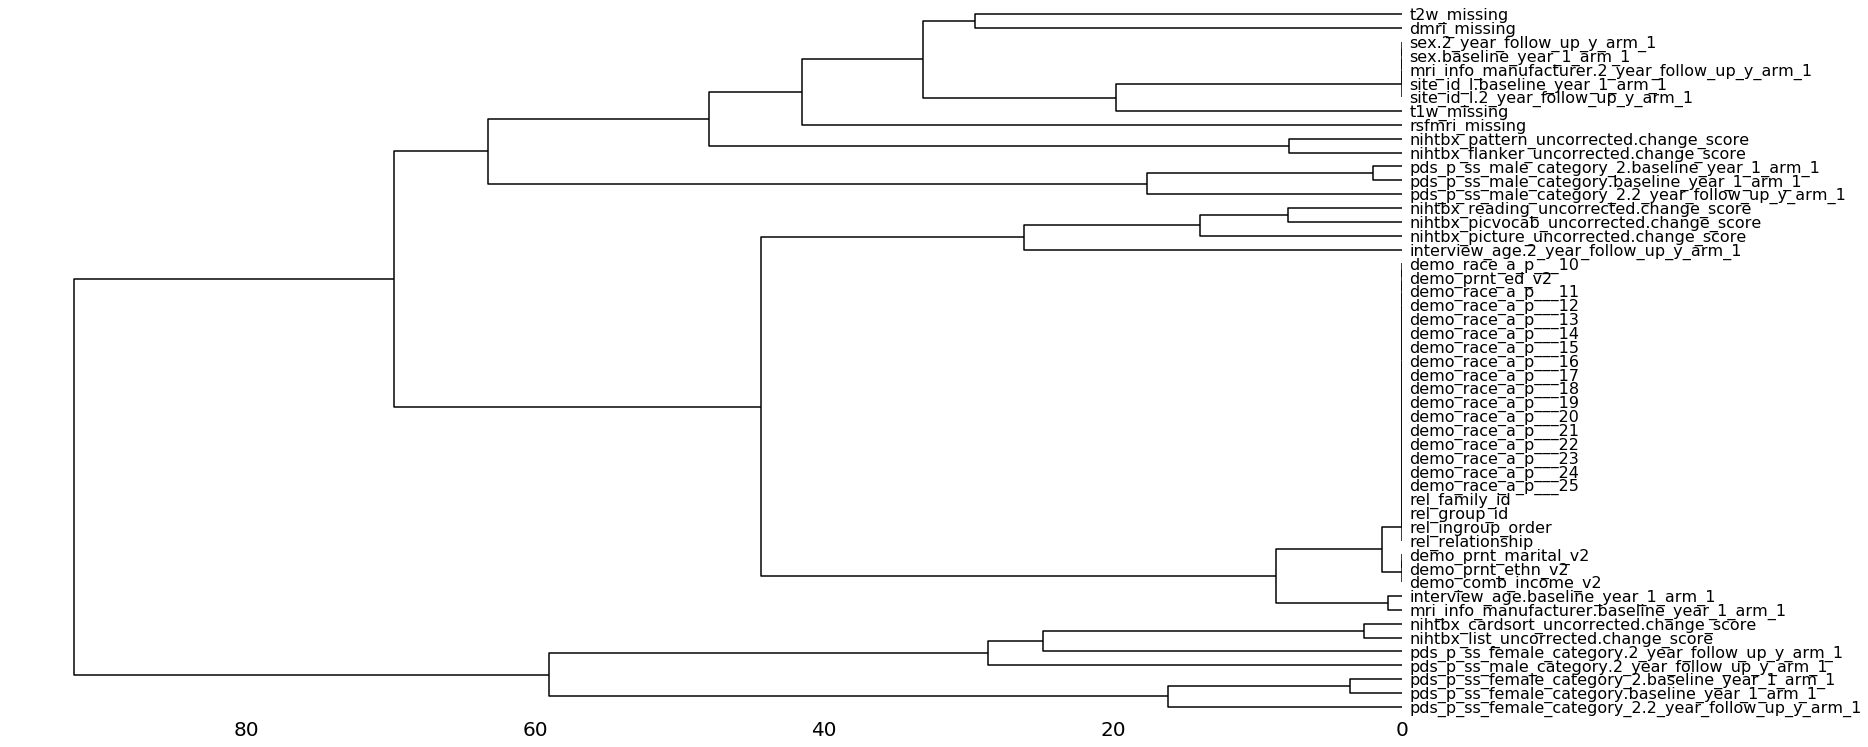

In [17]:
msno.dendrogram(miss_df)